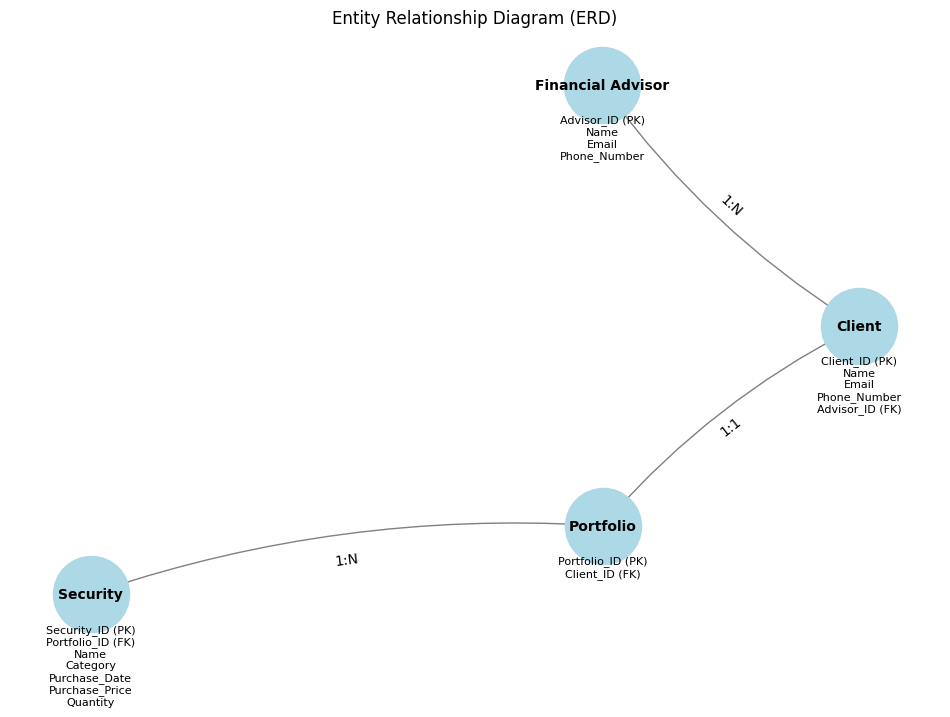

'ERD_Financial_Advisors.png'

In [1]:
from matplotlib import pyplot as plt
import networkx as nx

# Create a graph to represent the ERD
G = nx.DiGraph()

# Define nodes (entities) with attributes
entities = {
    "Financial Advisor": ["Advisor_ID (PK)", "Name", "Email", "Phone_Number"],
    "Client": ["Client_ID (PK)", "Name", "Email", "Phone_Number", "Advisor_ID (FK)"],
    "Portfolio": ["Portfolio_ID (PK)", "Client_ID (FK)"],
    "Security": ["Security_ID (PK)", "Portfolio_ID (FK)", "Name", "Category", "Purchase_Date", "Purchase_Price", "Quantity"]
}

# Add entities as nodes
for entity, attributes in entities.items():
    G.add_node(entity, attributes="\n".join(attributes))

# Define relationships
relationships = [
    ("Financial Advisor", "Client", "1:N"),
    ("Client", "Portfolio", "1:1"),
    ("Portfolio", "Security", "1:N")
]

# Add edges for relationships
for src, dst, rel in relationships:
    G.add_edge(src, dst, label=rel)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=3000)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray", connectionstyle="arc3,rad=0.1")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Add node attributes (entity attributes)
for node, (x, y) in pos.items():
    plt.text(x, y - 0.1, G.nodes[node]['attributes'], fontsize=8, ha='center', va='top')

# Add relationship labels
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Save the diagram as an image
output_path = "ERD_Financial_Advisors.png"
plt.title("Entity Relationship Diagram (ERD)")
plt.axis("off")
plt.savefig(output_path, format="png", dpi=300)
plt.show()

output_path
